In [1]:
import gym
import numpy as np
import time


In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual, Output, Controller
import ipywidgets as widgets
from IPython.display import display
from IPython.display import clear_output
import functools
from jupyter_ui_poll import ui_events

In [3]:
#beep signals during training
import jupyter_beeper

b = jupyter_beeper.Beeper()

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [5]:
#blgd-v0 - BlindGrasp with Discrete actions-v0
#GUT=True - works only locally and not in Google Colab
#ResetCount=250, Reset after 250 actions
env=gym.make("gym_blg:blgd-v0", GUI=True,ResetCount=250)

In [ ]:
env.reset()

In [6]:
def decode_obs(obs):
    #decodes the observation into sensor readings (normalized)
    #proximity
    # - Proximity sensor array, 22 values, 0 or 1
    # - we are using only using the sensors from the tip - 7 on side and 4 at tip of each fingwe
    #pos
    # - End effector x,y,z position - (stacked with 2 previous positions for temporal info)
    #   9 values - normalized between 0 and 1 
    #force
    # - End Effector x,y,x force - 3 values, normalized between 0-1
    #ObjMap
    # - The workspace(tray) are is divided into 32x32 cells
    # - ObjMap marks those positions/cells where the proximity sensors detected the presence of any object
    # - If object present 1, else 0
    #VisitMap
    # - VisitMap marks the cells (of 32x32 array) visited by end effector as 1.
    # - This info is to incentivize the agent to visit unexplored cells
    #CurPosMap
    # - The cell corresponding to the xy position of end effector is 1 in this 32x32 array
    #GelSight1 and GelSight2
    # - GelSight Depth data from the gripper, 32x32 each
    # - values normalized between 0-1
    prox = obs[:17]
    pos = obs[17:26]
    force = obs[26:29]
    ObjMap= obs[29:1053] #1053 = 29 +(32*32)
    VisitMap = obs[1053:2077] #2077=1053+(32*32)
    CurPosMap =obs[2077:3101] #3101=2077+(32*32)
    #GelSight1=obs[3101:4125] #4125=3101+(32*32)
    #GelSight2=obs[4125:5149]# 5149=4125+(32*32) 
    return prox,pos,force,ObjMap,VisitMap,CurPosMap#,GelSight1, GelSight2
    

In [7]:
humancmd = None
ui_done = False
#GUI button callback
def on_button_clicked(b, rs_=0):
    #step
    global ui_done
    global humancmd
    humancmd = rs_
    ui_done= True
    '''
    obs, rew,Done,misc  = env.step(rs_)
    #decode observations
    #prox,pos,force,ObjMap,VisitMap,CurPosMap,GelSight1, GelSight2 = decode_obs(obs)
    #remove gelsight
    prox,pos,force,ObjMap,VisitMap,CurPosMap = decode_obs(obs)
   
    #update maps
    #add CurPosMap to ObjMap and VisitMap for more intuitive visualization
    map_id1.set_data((ObjMap.reshape(32,32)+(CurPosMap.reshape(32,32)*10.0)))
    map_id2.set_data((VisitMap.reshape(32,32)+(CurPosMap.reshape(32,32)*10.0)))
    #map_id3.set_data(CurPosMap.reshape(32,32))
    #remove gelsight
    #map_id4.set_data(GelSight1.reshape(32,32))
    #map_id5.set_data(GelSight2.reshape(32,32))
    #TODO -  save the state-action-obs-reward for pretraining the agent
    rBox.value=rew
    pos = np.around(pos,3)
    force = np.around(force,3)
    tBoxVal = str(pos[0])+" "+ str(pos[1])+" "+str(pos[2]) +" F " + str(force[0]) +" "+ str(force[1]) +" "+ str(force[2])
    #print(rew)
    tBox.value=tBoxVal
    '''
    

In [8]:
# Reset callback from GUI button
def resetenv(b):
    env.reset()

In [9]:
#define the GUI buttons
buttonl = widgets.Button(description="Left")
buttonr = widgets.Button(description="Right")
buttonf = widgets.Button(description="Fwd")
buttonb = widgets.Button(description="Back")
buttonl.style.button_color = 'lightgreen'
buttonr.style.button_color = 'lightgreen'
buttonf.style.button_color = 'lightgreen'
buttonb.style.button_color = 'lightgreen'

buttonfl = widgets.Button(description="F Left")
buttonfr = widgets.Button(description="F Right")
buttonbl = widgets.Button(description="B Left")
buttonbr = widgets.Button(description="B Right")

buttonu = widgets.Button(description="Up")
buttond = widgets.Button(description="Down")
buttonuj = widgets.Button(description="Up 10x")
buttondj = widgets.Button(description="Down 10x")
buttonu.style.button_color = 'lightblue'
buttond.style.button_color = 'lightblue'
buttonuj.style.button_color = 'lightblue'
buttondj.style.button_color = 'lightblue'


buttongro = widgets.Button(description="Gripper Open")
buttongrc = widgets.Button(description="Gripper Close")
buttongro.style.button_color = 'moccasin'
buttongrc.style.button_color = 'moccasin'

buttonrst = widgets.Button(description="RESET")
buttonrst.style.button_color = 'red'
#Define the callback
buttonl.on_click(functools.partial(on_button_clicked, rs_=4))
buttonr.on_click(functools.partial(on_button_clicked, rs_=5))
buttonf.on_click(functools.partial(on_button_clicked, rs_=6))
buttonb.on_click(functools.partial(on_button_clicked, rs_=7))

buttonfl.on_click(functools.partial(on_button_clicked, rs_=8))
buttonfr.on_click(functools.partial(on_button_clicked, rs_=9))
buttonbl.on_click(functools.partial(on_button_clicked, rs_=10))
buttonbr.on_click(functools.partial(on_button_clicked, rs_=11))

buttonu.on_click(functools.partial(on_button_clicked, rs_=0))
buttond.on_click(functools.partial(on_button_clicked, rs_=1))
buttonuj.on_click(functools.partial(on_button_clicked, rs_=2))
buttondj.on_click(functools.partial(on_button_clicked, rs_=3))

buttongro.on_click(functools.partial(on_button_clicked, rs_=12))
buttongrc.on_click(functools.partial(on_button_clicked, rs_=13))

buttonrst.on_click(resetenv)

rBox=widgets.FloatText(value=2.0, disabled=True)
tBox=widgets.Text(value="X-Y-Z Positions - Forces", disabled=True)

#organize the buttons
col1=widgets.VBox([buttongro,buttonbl,buttonl,buttonfl])
col2=widgets.VBox([buttonb,buttonu,buttond,buttonf])
col3=widgets.VBox([buttongrc,buttonbr,buttonr,buttonfr])
col4=widgets.VBox([buttonuj,buttondj,buttonrst,rBox])
col5=widgets.HBox([tBox])

In [10]:
#gamepad callbacks
def on_click2(change):
    #print("ev",pad.buttons[0] )
    if(pad.buttons[12].value==1.0):
        #print("F")
        on_button_clicked(None,7)
    elif(pad.buttons[13].value==1.0):
        #print("B")
        on_button_clicked(None,6)
    elif(pad.buttons[14].value==1.0):
        #print("L")
        on_button_clicked(None,4)
    elif(pad.buttons[15].value==1.0):
        #print("R")
        on_button_clicked(None,5)
    elif(pad.buttons[4].value==1.0):
        #print("U")
        on_button_clicked(None,0)
    elif(pad.buttons[6].value==1.0):
        #print("D")
        on_button_clicked(None,1)
    elif(pad.buttons[7].value==1.0):
        #print("DD")
        on_button_clicked(None,3)
    elif(pad.buttons[1].value==1.0):
        #print("O")
        on_button_clicked(None,12)
    elif(pad.buttons[2].value==1.0):
        #print("C")
        on_button_clicked(None,13)
    elif(pad.buttons[3].value==1.0):
        #print("RESET")
        resetenv(None)
        #on_button_clicked(None,13)    

In [11]:
gamepad=True
if(gamepad):
    pad = Controller()
    pad
#press any buttons on gamepad, else it may not initialize properly

In [12]:
if(gamepad):

    pad.buttons[12].observe(on_click2, names='value')
    pad.buttons[13].observe(on_click2, names='value')
    pad.buttons[14].observe(on_click2, names='value')
    pad.buttons[15].observe(on_click2, names='value')
    pad.buttons[6].observe(on_click2, names='value')
    pad.buttons[4].observe(on_click2, names='value')
    pad.buttons[7].observe(on_click2, names='value')

    pad.buttons[1].observe(on_click2, names='value')
    pad.buttons[2].observe(on_click2, names='value')
    pad.buttons[3].observe(on_click2, names='value')

<IPython.core.display.Javascript object>


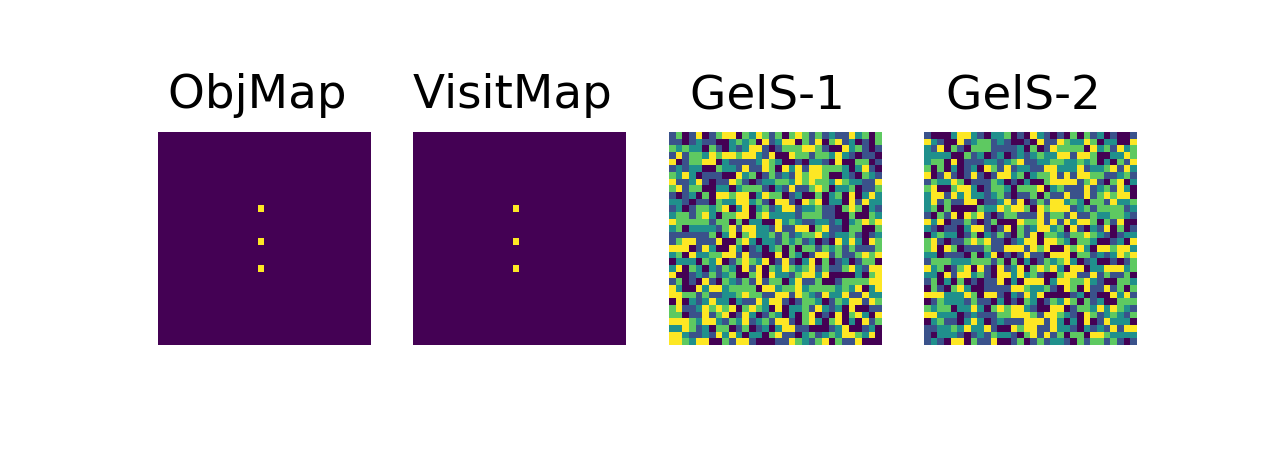

In [13]:
#plots
f = plt.figure(figsize=(4,1.5),dpi= 250)

i1=f.add_subplot(1,4,1)
i1.set_title('ObjMap ')
i1.axis('off')
map_id1=plt.imshow((np.random.rand(32,32)*10)//2)
i2=f.add_subplot(1,4,2)
i2.set_title('VisitMap ')
i2.axis('off')
map_id2=plt.imshow((np.random.rand(32,32)*10)//2)
#i3=f.add_subplot(1,5,3)
#i3.set_title('CurPosMap ')
#i3.axis('off')
#map_id3=plt.imshow((np.random.rand(32,32)*10)//2)
i4=f.add_subplot(1,4,3)
i4.set_title('GelS-1 ')
i4.axis('off')
map_id4=plt.imshow((np.random.rand(32,32)*10)//2)
i5=f.add_subplot(1,4,4)
i5.set_title('GelS-2 ')
i5.axis('off')
map_id5=plt.imshow((np.random.rand(32,32)*10)//2)




In [14]:
#from stable_baselines import PPO2
#from stable_baselines.gail import ExpertDataset
#TODO - save the action-observation-reward from human demonstration as specified in
# https://stable-baselines.readthedocs.io/en/master/guide/pretrain.html#data-structure-of-the-expert-dataset
#https://stable-baselines.readthedocs.io/en/master/_modules/stable_baselines/gail/dataset/record_expert.html

In [15]:
#reset the env and get initial observation
obs = env.reset()

In [16]:
n_episodes = 3 #number of episodes

In [17]:
actions = []
observations = []
rewards = []
episode_returns = np.zeros((n_episodes,))
episode_starts = []
ep_rew=[]
ep_start = []

In [18]:
ep_idx = 0

episode_starts.append(True)
reward_sum = 0.0
idx = 0
rsum=0
start_flag  =True

In [19]:
save_path = "data/demo_data.npz"
save_count  = 20
import os.path
data_exists = os.path.exists(save_path)
if(data_exists):
    prev_data = np.load(save_path)

In [20]:
def visualize(obs, rew=0):
    prox,pos,force,ObjMap,VisitMap,CurPosMap = decode_obs(obs)
    map_id1.set_data((ObjMap.reshape(32,32)+(CurPosMap.reshape(32,32)*10.0)))
    map_id2.set_data((VisitMap.reshape(32,32)+(CurPosMap.reshape(32,32)*10.0)))
    rBox.value=rew
    pos = np.around(pos,3)
    force = np.around(force,3)
    tBoxVal = str(pos[0])+" "+ str(pos[1])+" "+str(pos[2]) +" F " + str(force[0]) +" "+ str(force[1]) +" "+ str(force[2])
    tBox.value=tBoxVal

In [21]:
#Display GUI
widgets.HBox([col1,col2,col3,col4])


In [22]:
#text box to show position and force values
widgets.HBox([col5])

In [23]:
def save_exp(npdict):
    global actions
    global observations 
    global rewards 
    #global episode_returns = np.zeros((n_episodes,))
    global episode_starts 
    global ep_start
    data_exists = os.path.exists(save_path)

    if(data_exists):
        prev_data = np.load(save_path)
        actions_ = np.append(prev_data['actions'], npdict['actions']).reshape(-1,1)
        obs_ = np.append(prev_data['obs'], npdict['obs']).reshape((-1,)+env.observation_space.shape)
        rewards_ = np.append(prev_data['rewards'], npdict['rewards'])
        episode_returns_ = np.append(prev_data['episode_returns'], npdict['episode_returns'])
        episode_starts_ = np.append(prev_data['episode_starts'], npdict['episode_starts'])
        #print("SAVEcallback",prev_data['episode_returns'],npdict['episode_returns']  )
        
        assert len(obs_) == len(actions_)
        total_data = {
            'actions': actions_,
            'obs': obs_,
            'rewards': rewards_,
            'episode_returns': episode_returns_,
            'episode_starts': episode_starts_
        }
        
        for key, val in total_data.items():
            print(key, val.shape)
        np.savez(save_path, **total_data)  
        
        #clear old data
        actions = []
        observations = []
        rewards = []
        #episode_returns = np.zeros((n_episodes,))
        episode_starts = []
        ep_start =[]
        
        
    else:
        print("savefirst")
        np.savez(save_path, **npdict)
        #clear old data
        actions = []
        observations = []
        rewards = []
        #episode_returns = np.zeros((n_episodes,))
        episode_starts = []
        ep_start =[]
    

In [ ]:
while ep_idx < n_episodes:
    print("starting", ep_idx, idx)
    observations.append(obs)
    
    if(idx==0):
        visualize(obs)
    else:
        visualize(obs,reward)
    #get action from human input
    #events = get_gamepad() 
    #while(checkButton()==None):
    ui_done = False
    #print("starting2", ep_idx, idx)
    
    with ui_events() as poll:
        while ui_done is False:
            poll(10)
            time.sleep(0.1)
        
    #humancmd = int(input())
    #time.sleep(0.1)
    #print("starting3", ep_idx, idx)
    action =humancmd
    humancmd=None
    obs, reward, done, _ = env.step(action)
    b.beep()
    visualize(obs, reward)
    
    actions.append(action)
    rewards.append(reward)
    episode_starts.append(done)
    reward_sum += reward
    idx += 1
    ep_start.append(start_flag)
    start_flag = False
    #print("gathering samples", idx, ep_idx)
    #if(idx==0):
    #    done = False

    if done:
        print("Done and restart")
        obs = env.reset()
        episode_returns[ep_idx] = reward_sum
        ep_rew.append(reward_sum)
        rsum = reward_sum
        reward_sum = 0.0
        ep_idx += 1
        start_flag = True
        
        
      
    #save data periodically
    if((idx>2 and (save_count%idx ==0)) or done):
        print("saving")
        observations_ = np.concatenate(observations).reshape((-1,) + env.observation_space.shape)
        actions_ = np.array(actions).reshape((-1, 1))
        rewards_ = np.array(rewards)
        #episode_starts_ = np.array(episode_starts[:-1])
        episode_starts_ = np.array(ep_start)
    
        assert len(observations_) == len(actions_)
        print("Save Data ", idx)
        if(done):
            print(" saving Done")
            numpy_dict = {
                'actions': actions_,
                'obs': observations_,
                'rewards': rewards_,
                'episode_returns': np.array(ep_rew),
                'episode_starts': episode_starts_
            }# type: Dict[str, np.ndarray]
            ep_rew = []
        else:
            print("saving count")
            numpy_dict = {
                'actions': actions_,
                'obs': observations_,
                'rewards': rewards_,
                'episode_returns': np.array([]),
                'episode_starts': episode_starts_
            }
        #for key, val in numpy_dict.items():
        #     print(key, val.shape)
    
        if save_path is not None:
            save_exp(numpy_dict)
            #np.savez(save_path, **numpy_dict)
                

env.close()    
    

starting 0 0
Done and restart
Done and restart


#### '''
d = np.load("demos.npz")
d2 = np.load("demos2.npz")

np.append(d['actions'], d2['actions']).reshape(-1,1)
np.append(d['obs'], d2['obs']).reshape((-1,)+env.observation_space.shape)
np.append(d['rewards'], d2['rewards'])
np.append(d['episode_returns'], d2['episode_returns'])
np.append(d['episode_starts'], d2['episode_starts'])



'''
env.observation_space.shape

In [ ]:
a=env.reset()

In [ ]:
a.shape

In [ ]:
from stable_baselines import PPO2
from stable_baselines.gail import ExpertDataset
# Using only one expert trajectory
# you can specify `traj_limitation=-1` for using the whole dataset


In [ ]:
dataset = ExpertDataset(expert_path=save_path,
                        traj_limitation=1, batch_size=2)

In [ ]:
model = PPO2('MlpPolicy',env, verbose=1)

In [ ]:
model.pretrain(dataset, n_epochs=1000)